## Army all over the world


### members names:  
May Ashkenazi

Barak Wizberger

Eden Jorno

Yuval Fainberg


### Data source: 
https://www.kaggle.com/datasets/prasertk/military-power-by-country-2022

In [2]:
url= 'https://github.com/mayas9/my-project/raw/main/global%20firepower%202022%20wide.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from IPython.core.display import Image

In [4]:
Image(url= 'https://raw.githubusercontent.com/mayas9/my-project/main/army%20pic.jpg', width= 800 , height= 600)


In [5]:
Image(url= 'https://raw.githubusercontent.com/mayas9/my-project/main/%D7%A9%D7%A8%D7%99%D7%95%D7%9F3.jpg', width= 800 , height= 600)

In [6]:
army= pd.read_csv(url)

In [7]:
army.head()

,country,country_code,Active Personnel,Aircraft Carriers,Armored Vehicles,Attack Helicopters,Available Manpower,Coastline Coverage,Corvettes,Dedicated Attack,...,Square Land Area,Submarines,Tanker Fleet,Tanks,Total Aircraft Strength,Total Population,Towed Artillery,Trainers,Transports,Waterways (usable)
0,Afghanistan,AFG,0,0,530,0,14611901,0,0,0,...,652230,0,0,0,0,37466414,60,0,0,1200
1,Albania,ALB,8000,0,76,0,1513309,362,0,0,...,28748,0,0,0,19,3088385,0,0,0,41
2,Algeria,ALG,130000,0,6461,45,20916812,998,6,22,...,2381741,6,5,2196,552,43576691,450,87,58,0
3,Angola,ANG,107000,0,1210,15,6728529,1600,0,18,...,1246700,0,0,320,299,33642646,585,61,30,1300
4,Argentina,ARG,83000,0,800,0,20180574,4989,9,6,...,2780400,2,2,349,218,45864941,172,70,22,11000


In [8]:
army.columns = army.columns.str.replace(' ','_')

## בדיקת ערכים חסרים

In [9]:
army.isnull().sum()

country                      0
country_code                 0
Active_Personnel             0
Aircraft_Carriers            0
Armored_Vehicles             0
Attack_Helicopters           0
Available_Manpower           0
Coastline_Coverage           0
Corvettes                    0
Dedicated_Attack             0
Defense_Budget               0
Destroyers                   0
External_Debt                0
Fighters/Interceptors        0
Fit-for-Service              0
Foreign_Exchange/Gold        0
Frigates                     0
Helicopter_Carriers          0
Helicopters                  0
Labor_Force                  0
Merchant_Marine_Fleet        0
Mine_Warfare                 0
Navy_Ships                   0
Oil_Consumption              0
Oil_Production               0
Oil_Proven_Reserves          0
Paramilitary                 0
Patrol_Vessels               0
Ports_/_Trade_Terminals      0
Country_Budget               0
Railway_Coverage             0
Reaching_Mil_Age_Annually    0
Reserve_

#### לאחר מעבר על הנתונים זיהינו שבעמודת "נושאות המטוסים" יש חריגה במדינה סרי לנקה. המחשנו זאת ע"י גרף (בוקספלוט) בו ניתן לראות רעש מובהק, אותו ננקה ע"י החלפת הערך ל-0 

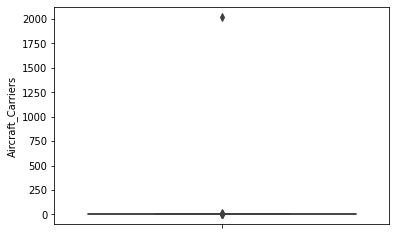

In [10]:
sns.boxplot(data= army, y= 'Aircraft_Carriers');

In [11]:
army.loc[(army.country== 'Sri Lanka'),'Aircraft_Carriers']= 0

In [12]:
max_def_budget=army[['country','Defense_Budget']].nlargest(10, 'Defense_Budget')

In [13]:
army['perc_def_budget']= army['Defense_Budget']/army['Country_Budget']*100
max_prec= army.nlargest(10, 'perc_def_budget')
min_prec= army.nsmallest(10, 'perc_def_budget')

### :ניתן לראות את רשימת 10 המדינות עם השקעת האחוז הגבוה ביותר של תקציב ביטחון מתוך תקציב המדינה  

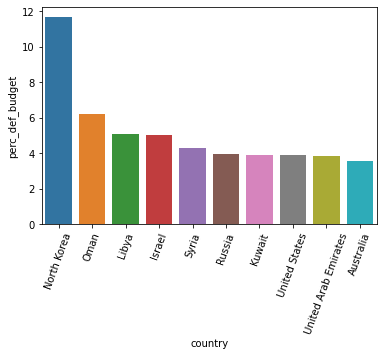

In [14]:
sns.barplot(data= max_prec, y= 'perc_def_budget', x= 'country') 
plt.xticks(rotation=70);


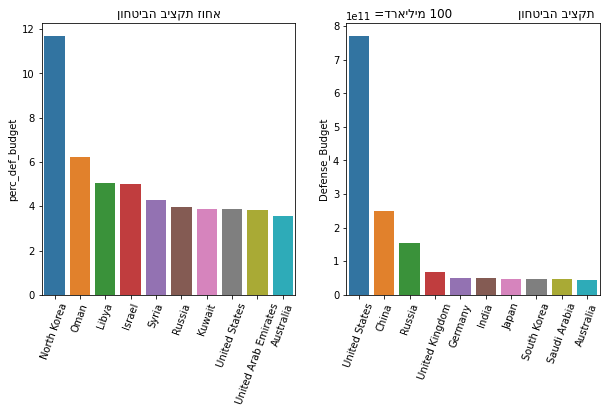

In [15]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
sns.barplot(ax= axes[0], data= max_prec, y= 'perc_def_budget', x= 'country').set(title= 'ןוחטיבה ביצקת זוחא') 
sns.barplot(ax= axes[1],data= max_def_budget, y= 'Defense_Budget', x= 'country').set(title= '      =דראילימ 100                 ןוחטיבה ביצקת') 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=70);
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=70);
axes[0].set_xlabel('');
axes[1].set_xlabel('');

#### מסקנה: אין חפיפה מושלמת בין המדינות בכל גרף. 
####  כמו כן, ניתן להבחין כי המדינות שמשקיעות את אחוז תקציב המדינה הגבוה ביותר 
#### :הן מדינות אשר המצב הבטחוני בהן בעייתי כמו למשל
#### ישראל: איום חיצוני ופנימי
#### לוב\סוריה: מלחמות אזרחים 
#### רוסיה: במלחמה כעת
#### ארה"ב: מעורבת במלחמות וסכסוכים חיצוניים לעתים קרובות
#### צפון קוריאה: מדינה דיקטטורית מאיימת

##### :קורלציה על עמודות נבחרות מהדאטה, בשילוב עמודת היחס בין תקציב הבטחון לבין תקציב המדינה שהוספנו קודם

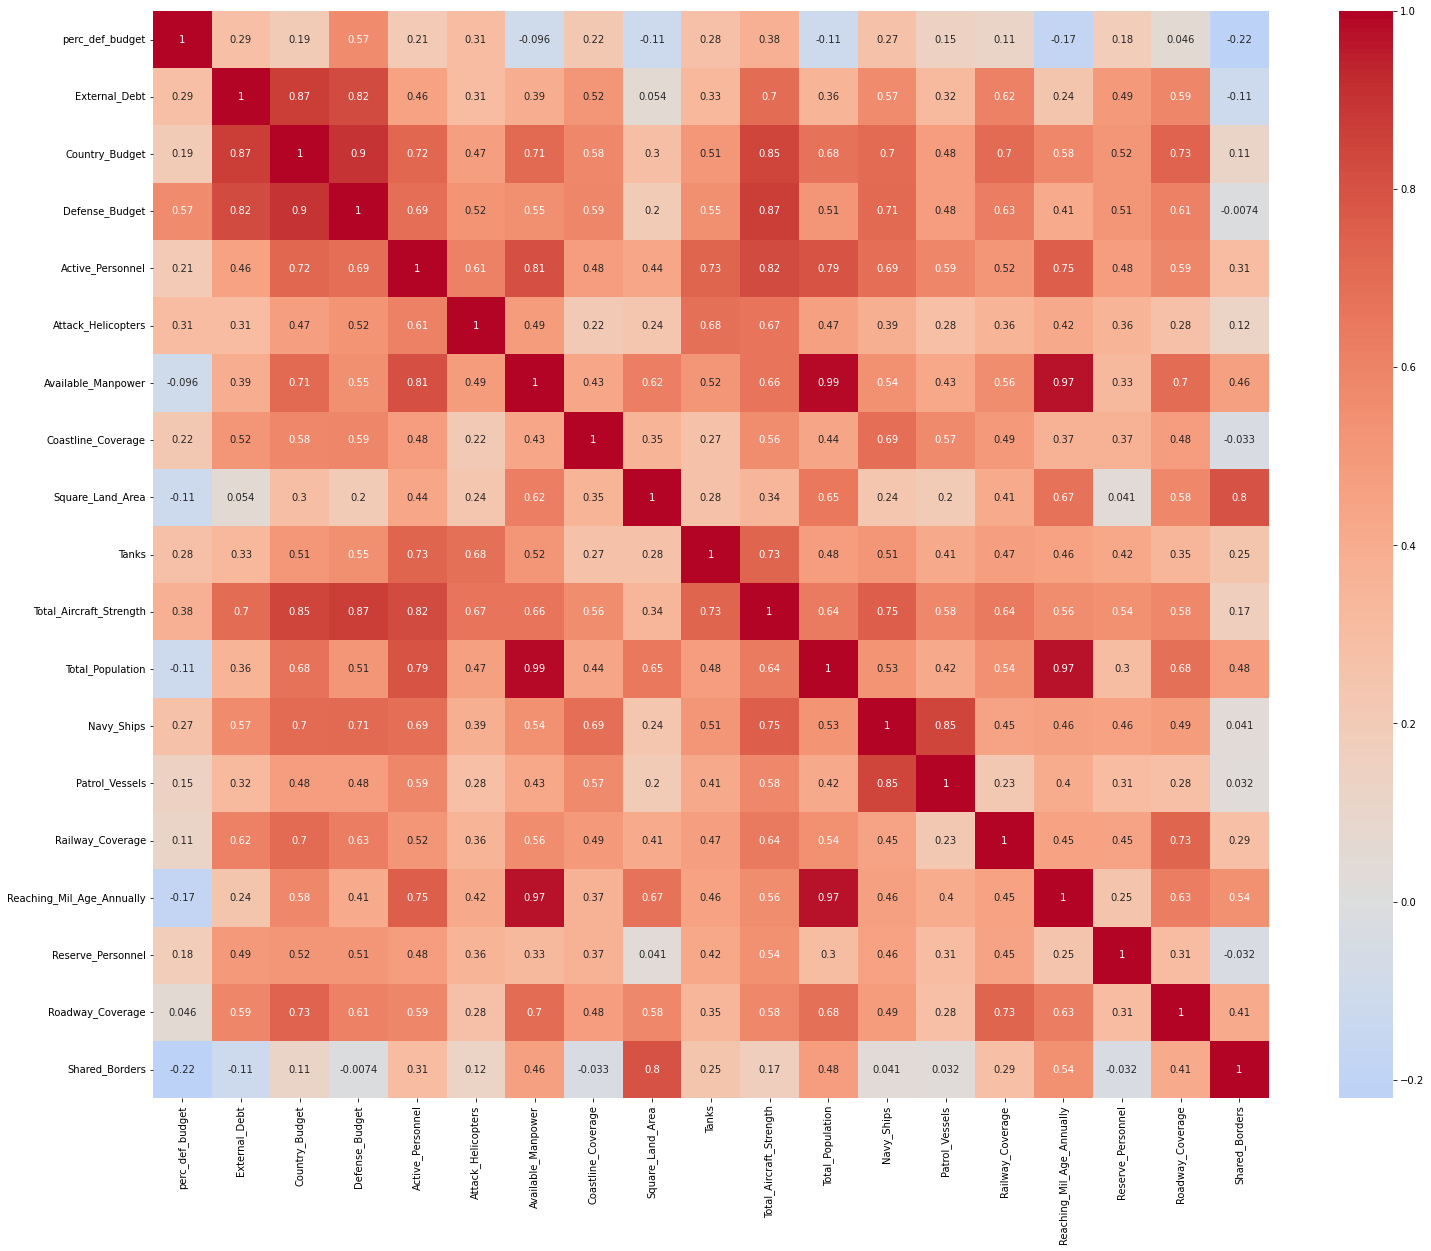

In [ ]:
features= ['perc_def_budget','External_Debt','Country_Budget','Defense_Budget','Active_Personnel','Attack_Helicopters','Available_Manpower','Coastline_Coverage','Square_Land_Area','Tanks','Total_Aircraft_Strength' ,'Total_Population','Navy_Ships','Patrol_Vessels','Railway_Coverage','Reaching_Mil_Age_Annually','Reserve_Personnel','Roadway_Coverage','Shared_Borders']
corrs = army[features].corr(method = 'spearman')

plt.figure(figsize=(25,20))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

In [ ]:
#sns.pairplot(army[['perc_def_budget','External_Debt','Country_Budget']], x= 'country')
#plt.show()

C:\Users\mayas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### ניתן לראות מהשורה הראשונה כי ישנה קורלציה של 0.38 בין אחוז השקעה בתקציב הבטחון לבין השקעה בכח אווירי 

In [19]:
Image(url= 'https://raw.githubusercontent.com/mayas9/army-project/main/airplain11.jpg', width= 800 , height= 600)

<AxesSubplot:xlabel='perc_def_budget', ylabel='Total_Aircraft_Strength'>

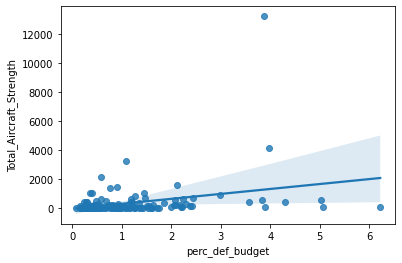

In [20]:
sns.regplot(data= army[(army['perc_def_budget']<10)] , x= 'perc_def_budget', y= 'Total_Aircraft_Strength')

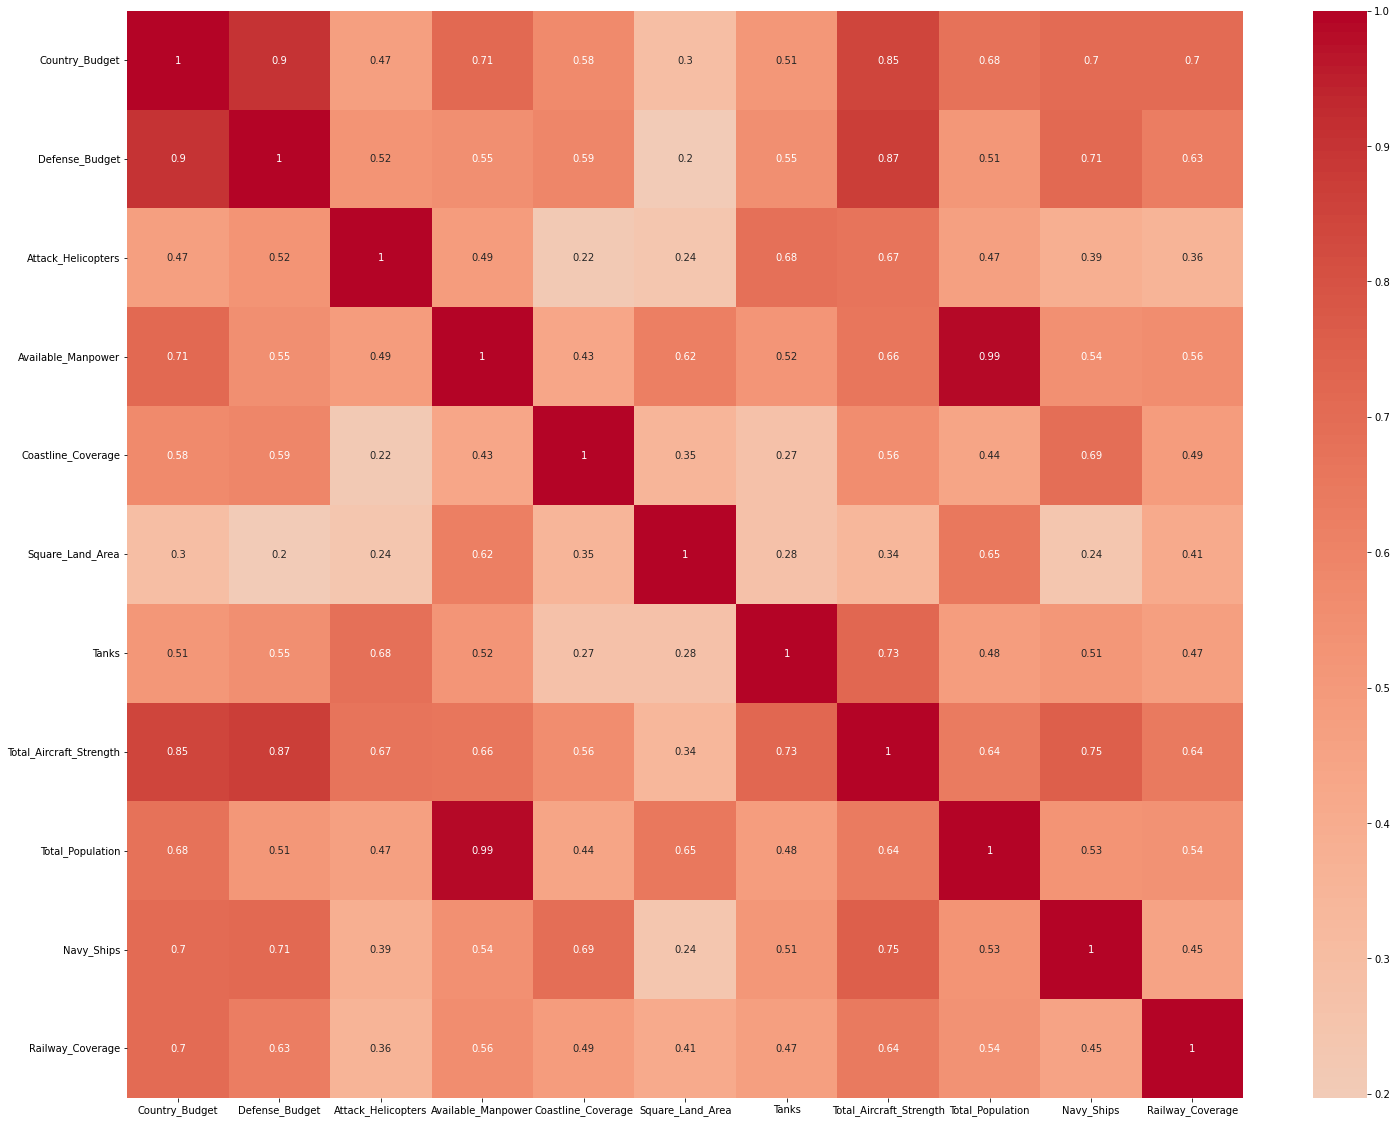

In [24]:
features= ['Country_Budget','Defense_Budget','Attack_Helicopters','Available_Manpower','Coastline_Coverage','Square_Land_Area','Tanks','Total_Aircraft_Strength' ,'Total_Population','Navy_Ships','Railway_Coverage']
corrs = army[features].corr(method = 'spearman')

plt.figure(figsize=(25,20))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

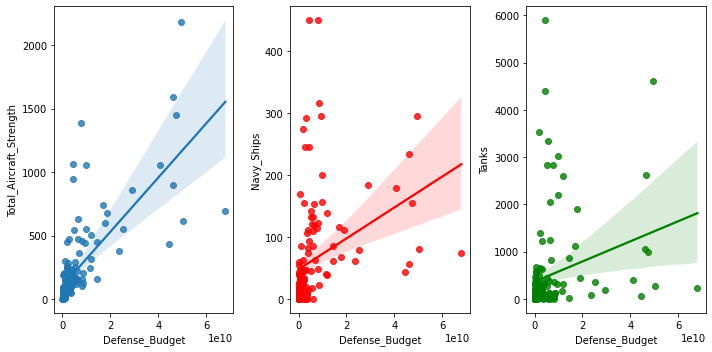

In [25]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=3)
sns.regplot(data= army[army['Defense_Budget']<100000000000] , x= 'Defense_Budget', y= 'Total_Aircraft_Strength',ax= axes[0])
sns.regplot(data= army[army['Defense_Budget']<100000000000] , x= 'Defense_Budget', y= 'Navy_Ships',ax= axes[1], color= 'r')
sns.regplot(data= army[army['Defense_Budget']<100000000000] , x= 'Defense_Budget', y= 'Tanks', ax= axes[2],color='g')
plt.tight_layout()

In [26]:
Image(url= 'https://raw.githubusercontent.com/mayas9/army-project/main/russia%20ukraine%20picture.jpeg', width= 700 , height= 600)

In [32]:
war= army[(army['country']== 'Russia') | (army['country']== 'Ukraine')|(army['country']== 'Israel')] 

### רצינו לחקור על המלחמה בין רוסיה לאוקראינה. בחרנו להציג פרמטרים כמותיים שיציגו את יחסי הכוחות בין המדינות בנוסף לצורך "קנה מידה" הוספנו את מדינת ישראל    

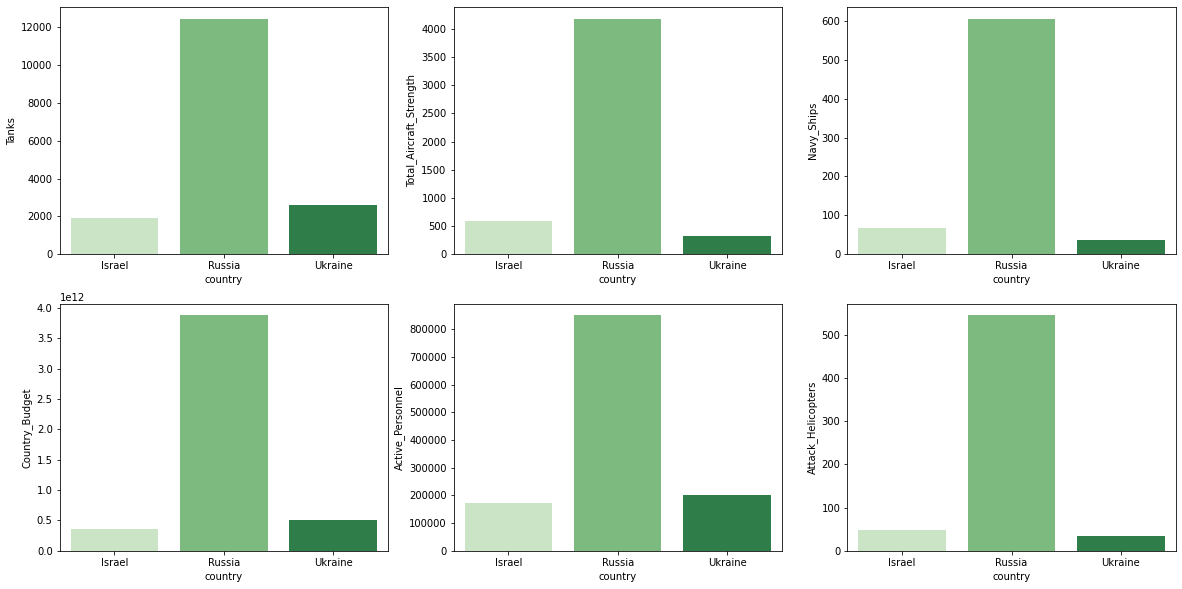

In [33]:
fig,axes= plt.subplots(figsize= (20,10),nrows=2 , ncols= 3 )
sns.barplot(ax= axes[0,0], x= 'country' ,y='Tanks', data= war,palette= 'Greens'); 
sns.barplot(ax= axes[0,1], x= 'country' ,y='Total_Aircraft_Strength', data= war,palette= 'Greens');
sns.barplot(ax= axes[0,2], x= 'country' ,y= 'Navy_Ships', data= war,palette= 'Greens');
sns.barplot(ax= axes[1,0], x= 'country' ,y='Country_Budget', data= war,palette= 'Greens');
sns.barplot(ax= axes[1,1], x= 'country' ,y= 'Active_Personnel', data= war,palette= 'Greens');
sns.barplot(ax= axes[1,2], x= 'country' ,y= 'Attack_Helicopters', data= war,palette= 'Greens');


### מהגרפים לעיל, ניתן לראות כי בכלל הפרמטרים שנבדקו, רוסיה ביתרון חד משעמי לעומת ישראל ואוקראינה 
[מצב מלחמה עדכני רוסיה-אוקראינה](https://makospecial.co.il/ukrainewar)

In [34]:
army['perc_active_available']= army['Active_Personnel']/army['Available_Manpower']*100
army['perc_aircraft_area']= army['Total_Aircraft_Strength']/army['Square_Land_Area']*100

יצרנו עמודות של יחס בין כמות חיילים פעילים לבין כמות אנשים שכשירים לשרת בצבא
בנוסף עמודה של יחס בין כח אווירי ביחס לגודל המדינה

### לאחר שהצגנו את הנתונים הכמותיים, כעת נציג נתונים יחסיים באחוזים:
1. יחס בין מספר החיילים לבין מספר אנשים כשירים לשירות
2. יחס בין עוצמת הכח האווירי לבין שטח המדינה
3. יחס בין תקציב המדינה לבין תקציב הביטחון

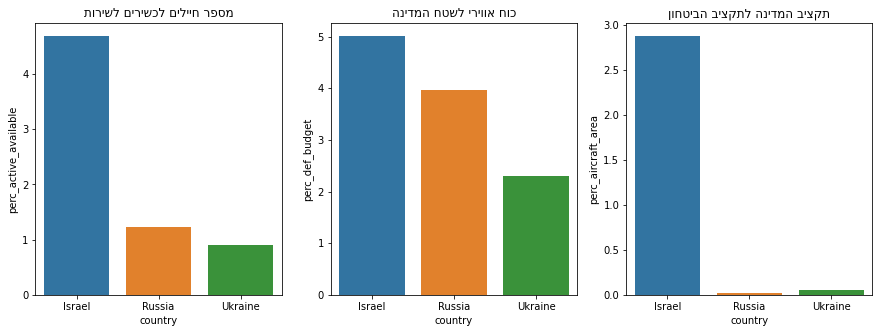

In [35]:
fig,axes= plt.subplots(figsize= (15,5) , ncols= 3 )
sns.barplot(ax= axes[0], x= 'country' ,y='perc_active_available', data= war).set(title= "תורישל םירישכל םילייח רפסמ");
sns.barplot(ax= axes[1], x= 'country' ,y='perc_def_budget', data= war).set(title= "הנידמה חטשל יריווא חוכ");
sns.barplot(ax= axes[2], x= 'country' ,y= 'perc_aircraft_area', data= war).set(title= "ןוחטיבה ביצקתל הנידמה ביצקת");



##### מסקנה: מהניתוח שערכנו ניתן להסיק כי רוסיה ביחס לישראל ואוקראינה אכן בעלת הכח הצבאי ההרב ביותר מבחינה כמותית, מה שמאשש את יתרונה במלחמה. אך עם זאת ניתן להבחין כי ישראל משקיעה את האחוז הגבוה ביותר בהשקעה כספית, הקצאת כח אדם ומשאבים צבאיים.

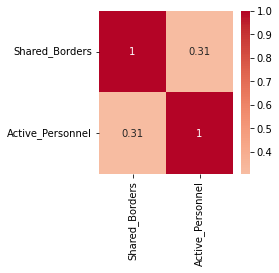

In [36]:
borders_cor=army.loc[:,['Shared_Borders' , 'Active_Personnel']].corr(method= 'spearman')
plt.figure(figsize=(3,3))  #figure size
sns.heatmap(borders_cor, cmap='coolwarm', center=0, annot = True);

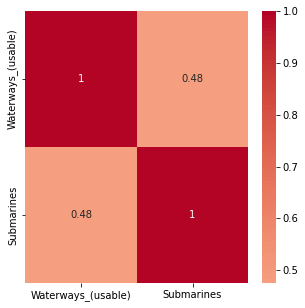

In [37]:
water_cor=army.loc[:,[ 'Waterways_(usable)', 'Submarines']].corr(method= 'spearman')
plt.figure(figsize=(5,5))  #figure size
sns.heatmap(water_cor, cmap='coolwarm', center=0, annot = True);

<AxesSubplot:xlabel='Waterways_(usable)', ylabel='Submarines'>

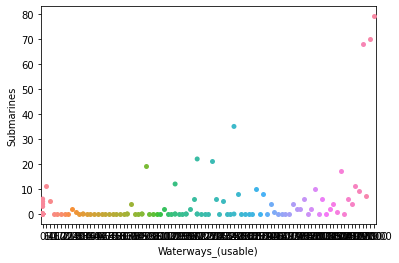

In [38]:
sns.stripplot(x='Waterways_(usable)', y='Submarines', data=army,jitter=0.001)